# **Assignment-1**

## **Question 1**

#MDP Diagram

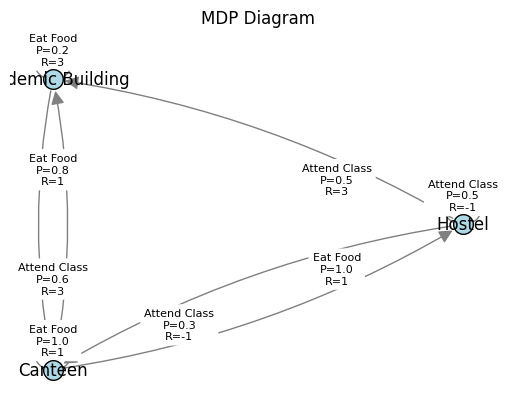

In [85]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define states in MDP
states = ["Hostel", "Academic Building", "Canteen"]

# Define transitions: (from_state, to_state, action, probability, reward)
transitions = [
    ("Hostel", "Academic Building", "Attend Class", 0.5, 3),
    ("Hostel", "Hostel", "Attend Class", 0.5, -1),
    ("Hostel", "Canteen", "Eat Food", 1.0, 1),
    ("Academic Building", "Academic Building", "Attend Class", 0.7, 3),
    ("Academic Building", "Canteen", "Attend Class", 0.3, 1),
    ("Academic Building", "Canteen", "Eat Food", 0.8, 1),
    ("Academic Building", "Academic Building", "Eat Food", 0.2, 3),
    ("Canteen", "Academic Building", "Attend Class", 0.6, 3),
    ("Canteen", "Hostel", "Attend Class", 0.3, -1),
    ("Canteen", "Canteen", "Attend Class", 0.1, 1),
    ("Canteen", "Canteen", "Eat Food", 1.0, 1)
]

# Add nodes (states)
for state in states:
    G.add_node(state)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color="lightblue", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Add edges (transitions)
for from_state, to_state, action, probability, reward in transitions:
    G.add_edge(from_state, to_state, label=f"{action}\nP={probability}\nR={reward}")
pos = nx.circular_layout(G)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color="gray", connectionstyle="arc3,rad=0.1")
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, rotate=False, label_pos=0.3)

plt.title("MDP Diagram")
plt.axis('off')
plt.show()


In [86]:
import numpy as np

gamma = 0.9
states = ['H', 'A', 'C'] # H = Hostel, A = Academic Building, C = Canteen
actions = ['Attend Class', 'Eat Food']
rewards = {'H': -1, 'A': 3, 'C': 1}

transition_probabilities = {
    'H': {'Attend Class': {'H': 0.5, 'A': 0.5}, 'Eat Food': {'C': 1.0}},
    'A': {'Attend Class': {'A': 0.7, 'C': 0.3}, 'Eat Food': {'C': 0.8, 'A': 0.2}},
    'C': {'Attend Class': {'A': 0.6, 'H': 0.3, 'C': 0.1}, 'Eat Food': {'C': 1.0}}
}

# Initialize value function for Value Iteration
V = {state: 0 for state in states}

# Value Iteration
max_iterations = 100
tolerance = 0.01
for iteration in range(max_iterations):
    delta = 0
    V_new = V.copy()
    for state in states:
        max_value = float('-inf')
        for action in actions:
            value = sum(
                transition_probabilities[state][action][next_state] *
                (rewards[next_state] + gamma * V[next_state])
                for next_state in transition_probabilities[state][action]
            )
            if value > max_value:
                max_value = value
        delta = max(delta, abs(max_value - V[state]))
        V_new[state] = max_value
    V = V_new
    if delta < tolerance:
        break

optimal_values_vi = V

# Initialize random policy for Policy Iteration
policy = {state: np.random.choice(actions) for state in states}
V = {state: 0 for state in states}  # Reset value function for policy iteration

policy_stable = False
while not policy_stable:
    for iteration in range(max_iterations): # Policy Evaluation
        delta = 0
        V_new = V.copy()
        for state in states:
            action = policy[state]
            value = sum(
                transition_probabilities[state][action][next_state] *
                (rewards[next_state] + gamma * V[next_state])
                for next_state in transition_probabilities[state][action]
            )
            delta = max(delta, abs(value - V[state]))
            V_new[state] = value
        V = V_new
        if delta < tolerance:
            break

    # Policy Improvement
    policy_stable = True
    for state in states:
        old_action = policy[state]
        action_values = {}
        for action in actions:
            action_values[action] = sum(
                transition_probabilities[state][action][next_state] *
                (rewards[next_state] + gamma * V[next_state])
                for next_state in transition_probabilities[state][action]
            )
        best_action = max(action_values, key=action_values.get)
        policy[state] = best_action
        if old_action != best_action:
            policy_stable = False

optimal_policy = policy
optimal_values_pi = V

print(f'Optimal Values (Value Iteration): {optimal_values_vi}')
print(f'Optimal Values (Policy Iteration): {optimal_values_pi}')
print(f'Optimal Policy (Value Iteration): {optimal_policy}')

Optimal Values (Value Iteration): {'H': 18.866072123704473, 'A': 20.855267303092198, 'C': 19.72214637221535}
Optimal Values (Policy Iteration): {'H': 18.86231878992597, 'A': 20.851513969313693, 'C': 19.71839303843684}
Optimal Policy (Value Iteration): {'H': 'Attend Class', 'A': 'Attend Class', 'C': 'Attend Class'}


The optimal values obtained from value iteration suggest that prioritizing actions leading to the Academic Building is generally more favorable in terms of maximizing rewards.

The optimal policy derived from policy iteration confirms these findings by suggesting actions that favor transitioning towards states with higher expected future rewards.

# **Question 2**

#Defining the Grid Plot

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Grid dimensions
grid_size = 9

# Define the rewards: +1 for goal, 0 otherwise
rewards = np.zeros((grid_size, grid_size))
goal_position = (0, 8)  # Position of the goal (star symbol)
rewards[goal_position] = 1

# Define the IN and OUT tunnel positions
in_tunnel = (6, 2)
out_tunnel = (2, 6)

# Define possible actions including diagonals
actions = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1),
    "up-left": (-1, -1),
    "up-right": (-1, 1),
    "down-left": (1, -1),
    "down-right": (1, 1)
}

# Define walls (these are positions that cannot be traversed)
walls = [
    (5, 1), (5, 2), (5, 3), (6, 3), (7, 3), (0, 5), (1, 5), (2, 5), (3, 5),
    (3, 6), (3, 7), (3, 8)
]


# Initialize value functions to zeros and set parameters

In [88]:
value_function_vi = np.zeros((grid_size, grid_size))
value_function_pi = np.zeros((grid_size, grid_size))
policy = np.zeros((grid_size, grid_size, 2))  # Initial random policy for Policy Iteration

gamma = 0.9
theta = 0.001

# Function to check if a state is within the grid boundaries and is not a wall
def is_valid_state(state):
    x, y = state
    return 0 <= x < grid_size and 0 <= y < grid_size and state not in walls

# Function to apply an action to a state
def apply_action(state, action):
    if state == in_tunnel:
        return out_tunnel  # Handle the tunnel transition
    x, y = state
    new_x = x + int(action[0]) # Convert action values to integers
    new_y = y + int(action[1]) # Convert action values to integers
    new_state = (new_x, new_y)
    return new_state if is_valid_state(new_state) else state


# Value Iteration algorithm

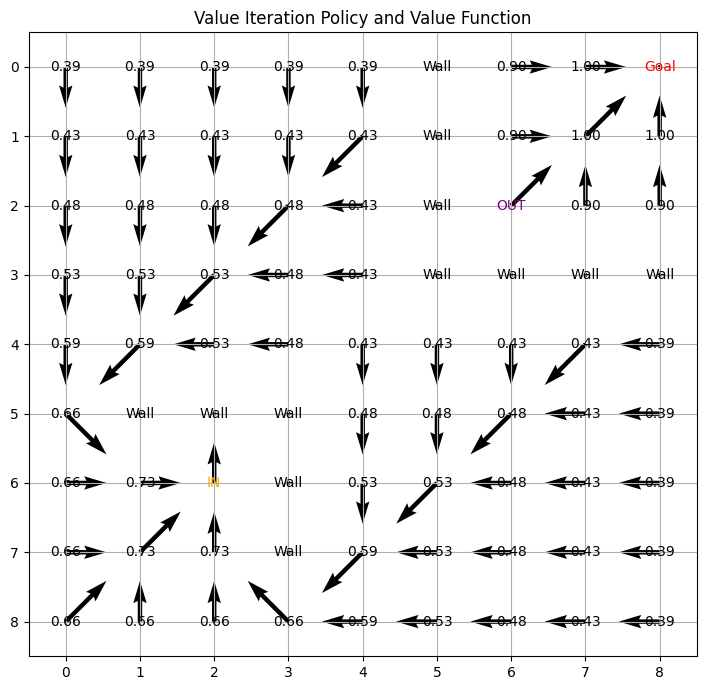

In [89]:
def value_iteration():
    global value_function_vi
    while True:
        delta = 0
        new_value_function = np.copy(value_function_vi)
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                if state == goal_position or state in walls:
                    continue  # Skip the goal and wall positions

                v = value_function_vi[state]
                value_estimates = []
                for action in actions.values():
                    next_state = apply_action(state, action)
                    value_estimates.append(rewards[next_state] + gamma * value_function_vi[next_state])

                new_value_function[state] = max(value_estimates)
                delta = max(delta, abs(v - new_value_function[state]))

        value_function_vi = new_value_function
        if delta < theta:
            break

# Run Value Iteration
value_iteration()

# Function to get the optimal policy based on the value function
def get_optimal_policy(value_function):
    policy = np.zeros((grid_size, grid_size, 2))  # Two channels for x and y directions
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if state == goal_position or state in walls:
                continue  # Skip goal and walls

            best_action = None
            best_value = -float('inf')
            for action in actions.values():
                next_state = apply_action(state, action)
                action_value = rewards[next_state] + gamma * value_function[next_state]
                if action_value > best_value:
                    best_value = action_value
                    best_action = action

            policy[i, j] = best_action

    return policy

# Prepare for quiver plot for Value Iteration
X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
U_vi = np.zeros((grid_size, grid_size))
V_vi = np.zeros((grid_size, grid_size))

# Get the optimal policy based on Value Iteration
optimal_policy_vi = get_optimal_policy(value_function_vi)
U_vi = optimal_policy_vi[:, :, 1]
V_vi = -optimal_policy_vi[:, :, 0]

# Set U and V to 0 for wall positions to avoid drawing arrows there
for wall in walls:
    U_vi[wall] = 0
    V_vi[wall] = 0
    U_pi[wall] = 0
    V_pi[wall] = 0

# Plot the value function for Value Iteration
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Value Iteration Policy and Value Function')
plt.xlim(-0.5, grid_size - 0.5)
plt.ylim(-0.5, grid_size - 0.5)
plt.grid(True)
plt.gca().invert_yaxis()
plt.quiver(X, Y, U_vi, V_vi)

# Display the value function values and labels on the grid
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) in walls:
            plt.text(j, i, 'Wall', ha='center', va='center', color='black')
        elif (i, j) == goal_position:
            plt.text(j, i, 'Goal', ha='center', va='center', color='red')
        elif (i, j) == in_tunnel:
            plt.text(j, i, 'IN', ha='center', va='center', color='orange')
        elif (i, j) == out_tunnel:
            plt.text(j, i, 'OUT', ha='center', va='center', color='purple')
        else:
            plt.text(j, i, f'{value_function_vi[i, j]:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

# Policy Evaluation for Policy Iteration

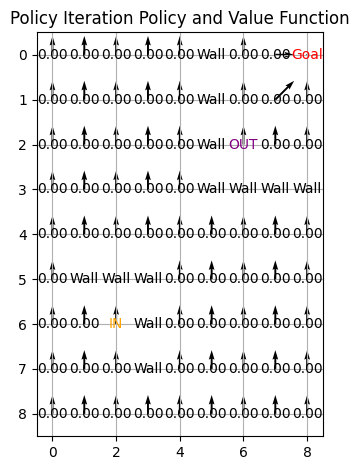

In [90]:
def policy_evaluation(policy):
    global value_function_pi
    while True:
        delta = 0
        new_value_function = np.copy(value_function_pi)
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                if state == goal_position or state in walls:
                    continue

                v = value_function_pi[state]
                action = policy[i, j]
                next_state = apply_action(state, action)
                new_value_function[state] = rewards[next_state] + gamma * value_function_pi[next_state]
                delta = max(delta, abs(v - new_value_function[state]))

        value_function_pi = new_value_function
        if delta < theta:
            break

# Policy Improvement for Policy Iteration
def policy_improvement():
    policy_stable = True
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if state == goal_position or state in walls:
                continue

            old_action = policy[i, j]
            best_action = None
            best_value = -float('inf')
            for action in actions.values():
                next_state = apply_action(state, action)
                action_value = rewards[next_state] + gamma * value_function_pi[next_state]
                if action_value > best_value:
                    best_value = action_value
                    best_action = action

            policy[i, j] = best_action
            if not np.array_equal(old_action, best_action):
                policy_stable = False

    return policy_stable

# Policy Iteration algorithm
def policy_iteration():
    global policy
    policy_stable = False
    while not policy_stable:
        policy_evaluation(policy)
        policy_stable = policy_improvement()

# Run Policy Iteration
policy_iteration()

# Prepare for quiver plot for Policy Iteration
U_pi = np.zeros((grid_size, grid_size))
V_pi = np.zeros((grid_size, grid_size))
U_pi = policy[:, :, 1]
V_pi = -policy[:, :, 0]

# Plot the value function for Policy Iteration
plt.subplot(1, 2, 2)
plt.title('Policy Iteration Policy and Value Function')
plt.xlim(-0.5, grid_size - 0.5)
plt.ylim(-0.5, grid_size - 0.5)
plt.grid(True)
plt.gca().invert_yaxis()
plt.quiver(X, Y, U_pi, V_pi)

# Display the value function values and labels on the grid
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) in walls:
            plt.text(j, i, 'Wall', ha='center', va='center', color='black')
        elif (i, j) == goal_position:
            plt.text(j, i, 'Goal', ha='center', va='center', color='red')
        elif (i, j) == in_tunnel:
            plt.text(j, i, 'IN', ha='center', va='center', color='orange')
        elif (i, j) == out_tunnel:
            plt.text(j, i, 'OUT', ha='center', va='center', color='purple')
        else:
            plt.text(j, i, f'{value_function_pi[i, j]:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()
